<a href="https://colab.research.google.com/github/ruslanmv/Neural-Networks-from-Scratch/blob/master/Custom_tuner_MMORPG_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tuner -q

     |████████████████████████████████| 133 kB 7.3 MB/s 


In [2]:
import keras_tuner
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [4]:
def df_to_numpy_image(df_image_clean,index):
    #select the row with index label 'index'
    image_clean=df_image_clean.loc[[index]].T.to_numpy()
    lists =image_clean.tolist()
    # Nested List Comprehension to flatten a given 2-D matrix
    # 2-D List
    matrix = lists
    flatten_matrix = [val.tolist() for sublist in matrix for val in sublist]
    # converting list to array
    arr = np.array(flatten_matrix)
    return arr
def df_to_numpy_input(df_input,index): 
    # flattening a 2d numpy array
    # into 1d array
    # and remove dtype at the end of numpy array
    lista=df_input.loc[[index]].values.tolist()
    arr=np.array(lista).ravel()
    return arr
#round a float up to next even number
import math
def roundeven(f):
    return math.ceil(f / 2.) * 2

In [5]:
import os
user = "ruslanmv"
repo = "Neural-Networks-from-Scratch"
# remove local directory if it already exists
if os.path.isdir(repo):
    !rm -rf {repo}
!git clone https://github.com/{user}/{repo}.git

Cloning into 'Neural-Networks-from-Scratch'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 178 (delta 60), reused 36 (delta 16), pack-reused 84
Receiving objects: 100% (178/178), 317.50 MiB | 30.67 MiB/s, done.
Resolving deltas: 100% (85/85), done.
Checking out files: 100% (53/53), done.


In [56]:
x_train = np.random.rand(1000, 28, 28, 1)
y_train = np.random.randint(0, 29, (1000, 1))
y_val = np.random.randint(0,  29, (1000, 1))
x_val = np.random.rand(1000, 28, 28, 1)

In [57]:
x_train.shape

(1000, 28, 28, 1)

In [58]:
y_train.shape

(1000, 1)

In [80]:
x_train = np.random.rand(200, 270, 480, 3)
x_val = np.random.rand(200, 270, 480, 3)

In [84]:
y_train = np.random.randint(0, 29, (200, 1))
y_val = np.random.randint(0,  29, (200, 1))

In [81]:
x_train.shape

(200, 270, 480, 3)

In [85]:
y_train.shape

(200, 1)

In [7]:
import os
os.chdir('Neural-Networks-from-Scratch')

In [8]:
import pandas as pd
#Importing Gamepad library
#We load the images of the gameplay
x_training_data=pd.read_pickle('data/dfx-0.pkl')  
#We load the inputs of the of the gameplay
y_training_data=pd.read_pickle('data/dfy-0.pkl')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x_training_data, y_training_data, test_size=0.2, random_state=6)
# Train Image part ( 4 Dimensional)
X_image = np.array([df_to_numpy_image(X_train,i) for i in X_train.index])
X=X_image.reshape(-1,width,height,3)
#Train Input part ( 1 Dimensional )
Y = [df_to_numpy_input(y_train,i) for i in y_train.index]
# Test Image part ( 4 Dimensional)
test_image = np.array([df_to_numpy_image(X_valid,i) for i in X_valid.index])
test_x=test_image.reshape(-1,width,height,3)
## Test Input part( 1 Dimensional )
test_y = [df_to_numpy_input(y_valid,i) for i in y_valid.index]

In [86]:
x_train = X_image
x_test=  test_image

In [76]:
#y_train = np.array(Y)
#y_test = np.array(test_y)

In [77]:
x_train.shape

(200, 270, 480, 3)

In [78]:
y_train.shape

(200, 29)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


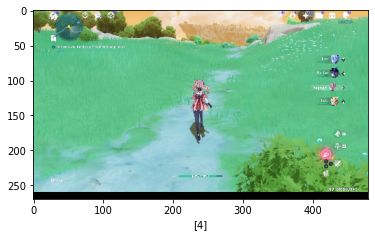

In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='binary')
plt.xlabel(y_train[0])
plt.show()

In [13]:
#We define the parameters
width= 480
height= 270
ncolors=3

#Normalization Parameter
Norma        = 29/1000
#Paramters                          Operation 
filters1     =  roundeven(96*Norma)   #1
kernel1      =  11       
stride1      =  4
kernel2      =  3                     #2
stride2      =  2
filters3     =  roundeven(256*Norma)  #3
kernel3      =  5
kernel4      =  3                     #4
stride4      =  2
filters5     =  roundeven(384*Norma)  #5
kernel5      =  3
filters6     =  roundeven(384*Norma)  #6
kernel6      =  3
filters7     =  roundeven(256*Norma)  #7
kernel7      =  3
kernel8      =  3                      #8
stride8      =  2 
activation9  =  roundeven(4096*Norma)  #9
activation10 =  roundeven(4096*Norma)  #10
outputs11    =  int(1000*Norma)   #11

In [88]:
class MyHyperModel(keras_tuner.HyperModel):
    def build(self, hp):
        """Builds a convolutional model."""
        #input_shape =(height, width, ncolors)
        #input_shape = (28, 28, 1)
        input_shape =(270, 480, 3)
       # x = keras.layers.Conv2D(filters=filters1, input_shape=input_shape, kernel_size=(11,11), strides=(stride1,stride1), padding='same')
       # x = keras.layers.Dense(units=hp.Choice("units", [32, 64, 128]), activation="relu")(x)
       # outputs = keras.layers.Dense(29)(x)
        inputs = keras.Input(shape=input_shape)
        x = keras.layers.Flatten()(inputs)
        x = keras.layers.Dense(
            units=hp.Choice("units", [32, 64, 128]), activation="relu"
        )(x)
        outputs = keras.layers.Dense(29)(x)



        return keras.Model(inputs=inputs, outputs=outputs)

    def fit(self, hp, model, x, y, validation_data, callbacks=None, **kwargs):
        # Convert the datasets to tf.data.Dataset.
        batch_size = hp.Int("batch_size", 32, 128, step=32, default=64)
        train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(
            batch_size
        )
        validation_data = tf.data.Dataset.from_tensor_slices(validation_data).batch(
            batch_size
        )

        # Define the optimizer.
        optimizer = keras.optimizers.Adam(
            hp.Float("learning_rate", 1e-4, 1e-2, sampling="log", default=1e-3)
        )
        loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

        # The metric to track validation loss.
        epoch_loss_metric = keras.metrics.Mean()

        # Function to run the train step.
        @tf.function
        def run_train_step(images, labels):
            with tf.GradientTape() as tape:
                logits = model(images)
                loss = loss_fn(labels, logits)
                # Add any regularization losses.
                if model.losses:
                    loss += tf.math.add_n(model.losses)
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Function to run the validation step.
        @tf.function
        def run_val_step(images, labels):
            logits = model(images)
            loss = loss_fn(labels, logits)
            # Update the metric.
            epoch_loss_metric.update_state(loss)

        # Assign the model to the callbacks.
        for callback in callbacks:
            callback.model = model

        # Record the best validation loss value
        best_epoch_loss = float("inf")

        # The custom training loop.
        for epoch in range(2):
            print(f"Epoch: {epoch}")

            # Iterate the training data to run the training step.
            for images, labels in train_ds:
                run_train_step(images, labels)

            # Iterate the validation data to run the validation step.
            for images, labels in validation_data:
                run_val_step(images, labels)

            # Calling the callbacks after epoch.
            epoch_loss = float(epoch_loss_metric.result().numpy())
            for callback in callbacks:
                # The "my_metric" is the objective passed to the tuner.
                callback.on_epoch_end(epoch, logs={"my_metric": epoch_loss})
            epoch_loss_metric.reset_states()

            print(f"Epoch loss: {epoch_loss}")
            best_epoch_loss = min(best_epoch_loss, epoch_loss)

        # Return the evaluation metric value.
        return best_epoch_loss


In [89]:
tuner = keras_tuner.RandomSearch(
    objective=keras_tuner.Objective("my_metric", "min"),
    max_trials=2,
    hypermodel=MyHyperModel(),
    directory="results",
    project_name="custom_training",
    overwrite=True,
)


In [90]:
tuner.search(x=x_train, y=y_train, validation_data=(x_val, y_val))


Trial 2 Complete [00h 00m 04s]
my_metric: 1543.4945068359375

Best my_metric So Far: 331.2069396972656
Total elapsed time: 00h 00m 08s
INFO:tensorflow:Oracle triggered exit


In [91]:
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

{'units': 128, 'batch_size': 64, 'learning_rate': 0.001}


In [92]:
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 270, 480, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 388800)            0         
                                                                 
 dense (Dense)               (None, 128)               49766528  
                                                                 
 dense_1 (Dense)             (None, 29)                3741      
                                                                 
Total params: 49,770,269
Trainable params: 49,770,269
Non-trainable params: 0
_________________________________________________________________


https://keras.io/guides/keras_tuner/custom_tuner/
https://medium.datadriveninvestor.com/hyperparameter-tuning-with-keras-tuner-3a609d3fd85b
https://discuss.tensorflow.org/t/unknown-metric-val-accuracy-using-keras-tuner-error/5991
https://github.com/keras-team/keras-tuner/issues/627
https://github.com/keras-team/keras-tuner/issues/631
https://www.tensorflow.org/tutorials/keras/keras_tuner

https://keras.io/guides/writing_a_training_loop_from_scratch/
https://www.programcreek.com/python/example/104424/keras.callbacks.EarlyStopping
https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
https://stackoverflow.com/questions/70010008/unknown-metric-val-accuracy-using-keras-tuner
https://github.com/keras-team/keras-io/blob/master/guides/keras_tuner/custom_tuner.py